In [3]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"D:\Publish_Project\GitHub\LinearRegression\Dataset\data_1.1.csv")

# convert from pandas to tensor format
X = torch.tensor(data['land_area'].values, dtype=torch.float32)
Y = torch.tensor(data['price'].values,  dtype=torch.float32)

# Normalize
X = (X - X.mean()) / X.std()
Y = (Y - Y.mean()) / Y.std()


In [5]:
X


tensor([-1.6136, -1.5169, -1.3703, -1.3202, -1.2441, -1.1179, -0.9928, -0.8530,
        -0.7609, -0.6051, -0.5153, -0.3709, -0.3141, -0.1356, -0.0924,  0.0509,
         0.1282,  0.2555,  0.4522,  0.5659,  0.6443,  0.7807,  0.8967,  0.9581,
         1.1002,  1.1548,  1.2742,  1.4015,  1.5084,  1.6516])

### Define our hypothesis and loss function.

In [6]:

def hypothesis(X):
    return theta0 + theta1 * X

def compute_loss(Y_pred, Y_true):
    return torch.mean((Y_pred - Y_true) ** 2)


learning_rates = [0.01, 0.001, 0.0001]
epochs = 1000
all_losses = {}
final_thetas = {}


for lr in learning_rates:
    
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    
    losses = []  

    # Gradient Descent loop
    for epoch in range(epochs):
        Y_pred = hypothesis(X)  
        loss = compute_loss(Y_pred, Y)  
        losses.append(loss.item())  
        
        # Backpropagation
        loss.backward()
        
        # Update parameters (theta0, theta1) using gradient descent
        with torch.no_grad():
            theta0 -= lr * theta0.grad
            theta1 -= lr * theta1.grad
        
        # Zero the gradients after updating
        theta0.grad.zero_()
        theta1.grad.zero_()

    
    all_losses[lr] = losses

   
    final_thetas[lr] = (theta0.item(), theta1.item())





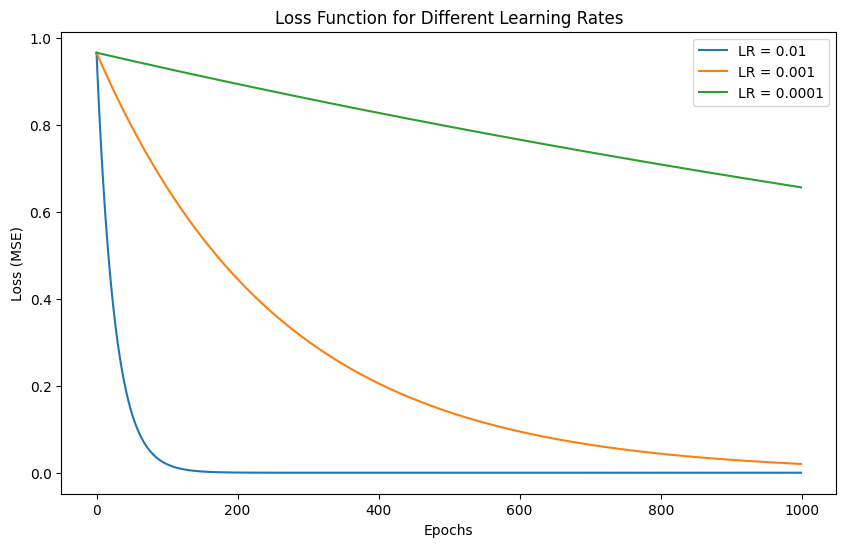

In [7]:
plt.figure(figsize=(10, 6))
for lr, losses in all_losses.items():
    plt.plot(range(epochs), losses, label=f'LR = {lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Function for Different Learning Rates')
plt.legend()
plt.show()



### comparing different learning rates

In [8]:
for lr, thetas in final_thetas.items():
    print(f"Learning Rate {lr}: Final theta0 = {thetas[0]}, Final theta1 = {thetas[1]}")

Learning Rate 0.01: Final theta0 = 8.96259066962557e-08, Final theta1 = 0.9997701048851013
Learning Rate 0.001: Final theta0 = 7.196891260718985e-08, Final theta1 = 0.8554097414016724
Learning Rate 0.0001: Final theta0 = 1.0056036003902591e-08, Final theta1 = 0.17576809227466583
